# Second analysis. Combining sets of answers.

In [53]:
import json

def load_data(file):
    with open (file, "r", encoding = "utf-8") as f:
        data = json.load(f)
    return data

In [54]:
Stats_data = load_data(r"C:\Users\isaia\OneDrive\Desktop\Academic work\Scholarly activities\Research voluntering\Research voluntering 2024 Dr. Sanocki\Stats & LLM\Topic-modeling\Stats_T.M_LDA\Data\Json Format\Sanocki_Stats_Data.json")
print(Stats_data.keys())


dict_keys(['ID_code', 'Question 1', 'Question 2', 'Question 3'])


In [55]:
# assigning the data stored in each key to different variables.

Id_code = Stats_data["ID_code"]
Question_1 = Stats_data["Question 1"]
Question_2 = Stats_data["Question 2"]
Question_3 = Stats_data["Question 3"]



In [56]:
import string 
from nltk.corpus import stopwords  


custom_stopwords = ["also", "occur", "lets", "us", "likely", "would", "make", "may", "know", "aka", "ok", "versa", "vice", "well", "way"]
stops = stopwords.words("english") + custom_stopwords  

def clean_docs(docs):
    stops = stopwords.words("english")

    final = [] 
 
    for doc in docs:
        clean_doc = remove_stop_punc(doc, stops)
        final.append(clean_doc)

    return(final)    


def remove_stop_punc(text, stops):
    words = text.split()
    final = []
    for word in words:
        if word.lower() not in stops:
            final.append(word) 

    final = " ".join(final)

    final = "".join([i for i in final if not i.isdigit()])

    final = final.replace("/", " ")

    final = final.replace("-", " ")

    final = final.translate(str.maketrans("", "", string.punctuation + "()"))

    while "  " in final:
        final = final.replace("  ", " ")
    return (final)



In [57]:
cleaned_Q1 = clean_docs(Question_1) 
cleaned_Q1 = [remove_stop_punc(doc, stops) for doc in cleaned_Q1] 

cleaned_Q2 = clean_docs(Question_2)
cleaned_Q2 = [remove_stop_punc(doc, stops) for doc in cleaned_Q2]

cleaned_Q3 = clean_docs(Question_3)
cleaned_Q3 = [remove_stop_punc(doc, stops) for doc in cleaned_Q3]


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(lowercase = True,
                             max_features = 300,
                             max_df = .50,
                             min_df = 2,
                             ngram_range = (1, 3),
                             stop_words = "english"
                             )

Q1_vectors = vectorizer.fit_transform(cleaned_Q1)
Q2_vectors = vectorizer.fit_transform(cleaned_Q2)
Q3_vectors = vectorizer.fit_transform(cleaned_Q3)

all_vectors_list = vectorizer.fit_transform(cleaned_Q1 + cleaned_Q2 + cleaned_Q3)



In [59]:
dense_Q1 = Q1_vectors.todense()
dense_Q2 = Q2_vectors.todense()
dense_Q3 = Q3_vectors.todense()

dense_Q1_list = dense_Q1.tolist()
dense_Q2_list = dense_Q2.tolist()
dense_Q3_list = dense_Q3.tolist()

all_vectors_dense_list = dense_Q1_list + dense_Q2_list + dense_Q3_list

print(all_vectors_dense_list)

feature_names = vectorizer.get_feature_names_out()


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24444982250706243, 0.0, 0.0, 0.0, 0.0, 0.3213290403116446, 0.3213290403116446, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2125420642029351, 0.0, 0.0, 0.0, 0.3213290403116446, 0.3213290403116446, 0.22735246710904927, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.26467170188325756, 0.26467170188325756, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28942128200751727, 0.3213290403116446, 0.3213290403116446, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13164690987395775, 0.16758743774605114, 0.0, 0.0, 0.14154701799148112, 0.0, 0.0, 0.0, 0.0, 0.18606340959345005, 0.18606340959345005, 0.0, 0.0, 0.0, 0.16758743774605114, 0.18606340959345005, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18606340959345005, 0.18606340959345005, 0.13164690987395775, 0

In [60]:
all_keywords = []

for description in all_vectors_dense_list:
    x = 0
    keywords = []
    for word in description:
        if word > .20:
            keywords.append(feature_names[x])
        x += 1
    all_keywords.append(keywords)    

In [61]:
true_k = 3

model = KMeans(
    n_clusters = true_k,
    init = "random",
    max_iter = 100,
    n_init = 50,
    random_state = 1 
                )

print(model.fit(all_vectors_list))


KMeans(init='random', max_iter=100, n_clusters=3, n_init=50, random_state=1)


In [62]:
#Changing data set from wide format to long format
import pandas as pd 
df = pd.DataFrame(Stats_data)

df_long = df.melt(id_vars = ["ID_code"], var_name = "Queston", value_name = "Response")

print(df_long)

   ID_code     Queston                                           Response
0      O.A  Question 1  Error helps determine the strength of the expe...
1      I.A  Question 1  The role that error plays in statistical infer...
2      J.B  Question 1  Error plays a role in statistical inference by...
3      P.C  Question 1  Error lets you know if the results of the stud...
4      K.C  Question 1  Error allows us to gain knowledge on a populat...
5      A.C  Question 1  The role that error plays in statistical infer...
6      A.G  Question 1  The chance of error can be decreased when the ...
7      A.K  Question 1  It allows people to determine how accurate a s...
8      K.K  Question 1  Error can help measure the random chance in an...
9      E.L  Question 1                 It weakens statistical inferences.
10    C.MD  Question 1  Discovering error, also known as chance, can h...
11     S.M  Question 1  Error affects the overall presentation of the ...
12     O.P  Question 1  Error which is

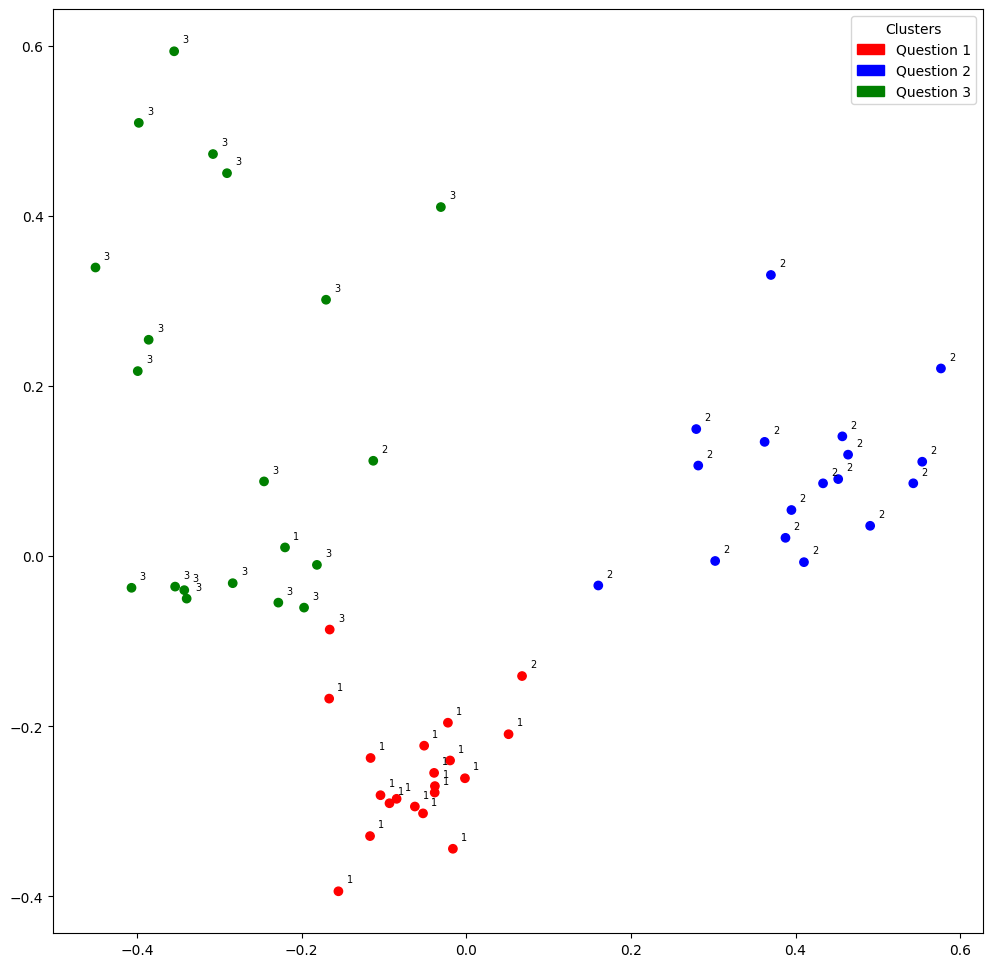

In [63]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

Kmean_indices = model.predict(all_vectors_list)

n_componets = 3

pca = PCA(n_components = n_componets)

scatter_plot_points = pca.fit_transform(all_vectors_list.toarray())

colors = ["red", "green", "blue"]

num_clusters = len(set(Kmean_indices))

x_axis = scatter_plot_points[:, 0]
y_axis = scatter_plot_points[:, 1]

fig, ax = plt.subplots(figsize = (12, 12))

scatter = ax.scatter(x_axis,
                     y_axis,
                     c = [colors[d] for d in Kmean_indices]
                     )

Red_points = mpatches.Patch(color = "red", label = "Question 1")
Blue_points = mpatches.Patch(color = "blue", label = "Question 2")    
Green_points = mpatches.Patch(color = "green", label = "Question 3")

   
question_labels = df_long["Queston"].tolist()
responses = df_long["Response"].tolist()

for i, label in enumerate(question_labels):
    ax.annotate(label.split()[-1], 
                (x_axis[i] + 0.01, 
                 y_axis[i] + 0.01), 
                 fontsize = 7)

ax.legend(handles = [Red_points, Blue_points, Green_points], title = "Clusters")

plt.show()

